# Wine Quality Exploratory Data Analysis

Made by: Anthony Kevin Oktavius

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
import plotly
import plotly.express as px
import shap
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Dataset Description**

In this dataset, there are 12 fields that can be used. Below are the details.
* Fixed Acidity
* Volatile Acidity
* Citric Acid
* Residual Sugar
* Chlorides
* Free Sulfur Dioxide
* Total Sulfur Dioxide
* Density
* pH
* Sulphates
* Alcohol
* Quality (score between 0 and 10)

## Data Loading

CSV Loading

In [3]:
red_wine_dataset = pd.read_csv("winequality-red.csv", sep = ';')
red_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine_dataset = pd.read_csv("winequality-white.csv", sep = ';')
white_wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Dataset Field Info

In [5]:
red_wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white_wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Dataset Statistics

In [7]:
red_wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
white_wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


List all Features

In [9]:
fixed_acidity_field = "fixed acidity"
volatile_acidity_field = "volatile acidity"
citric_acid_field = "citric acid"
residual_sugar_field = "residual sugar"
chlorides_field = "chlorides"
free_sulfur_dioxide_field = "free sulfur dioxide"
total_sulfur_dioxide_field = "total sulfur dioxide"
density_field = "density"
ph_field = "pH"
sulphates_field = "sulphates"
alcohol_field = "alcohol"
quality_field = "quality"

List all Numerical and Categorical Features

In [10]:
numerical_features = [fixed_acidity_field, volatile_acidity_field, citric_acid_field,
                      residual_sugar_field, chlorides_field, free_sulfur_dioxide_field,
                      total_sulfur_dioxide_field, density_field, ph_field, sulphates_field]
categorical_features = [quality_field]

List Wine Colors (Red and White)

In [11]:
wines = {
    "Red": red_wine_dataset, 
    "White": white_wine_dataset
}

List all features and target variables

In [23]:
target = quality_field
features = numerical_features.copy()

# Data Visualization

### Single Variable

#### Categorical Variables

Pie Chart - Composition

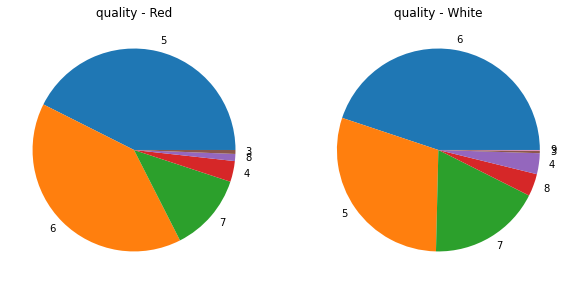

In [12]:
current_index = 0

for dataset_index, dataset_key in enumerate(wines):
    for index, feature in enumerate(categorical_features):
        plt.subplot(1, 2, current_index + 1)
        plt.title(f"{feature} - {dataset_key}")
        (wines[dataset_key][feature]).value_counts().plot(kind = 'pie', figsize = (10, 10), ylabel = "")
        current_index += 1

plt.show()

Box Plot - Comparison

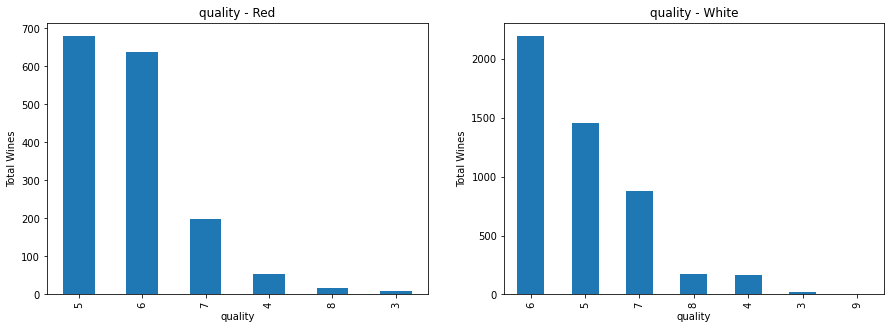

In [13]:
current_index = 0

for dataset_index, dataset_key in enumerate(wines):
    for index, feature in enumerate(categorical_features):
        plt.subplot(1, 2, current_index + 1)
        plt.title(f"{feature} - {dataset_key}")
        wines[dataset_key][feature].value_counts().plot(
            kind = 'bar', 
            figsize = (15, 5), 
            ylabel = "Total Wines",
            xlabel = feature,
        )
        current_index += 1

plt.show()

#### Numerical Variables

Distribution Plot - Distribution

White Wine


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

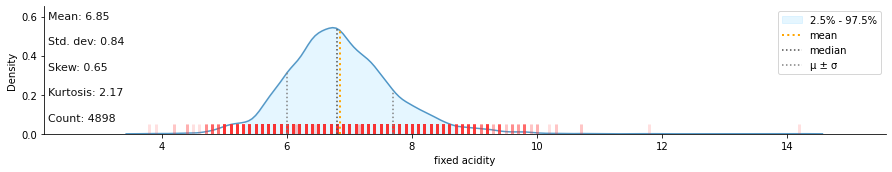

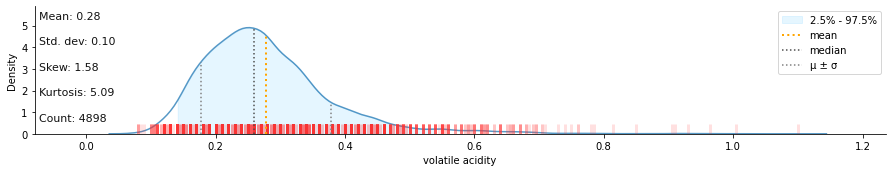

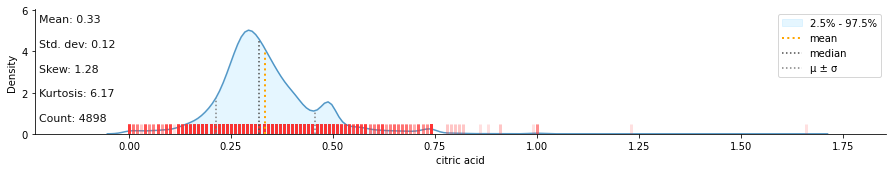

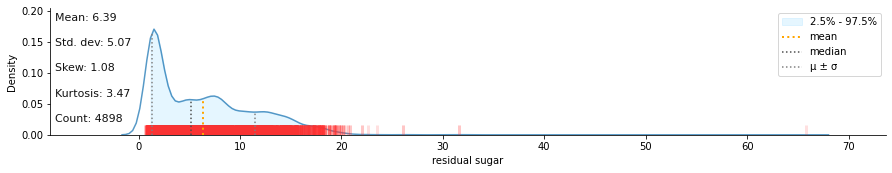

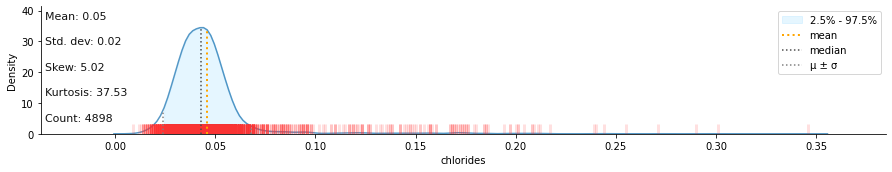

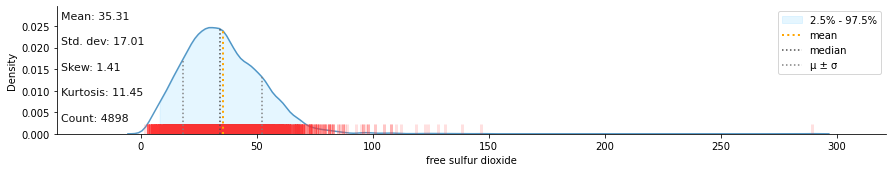

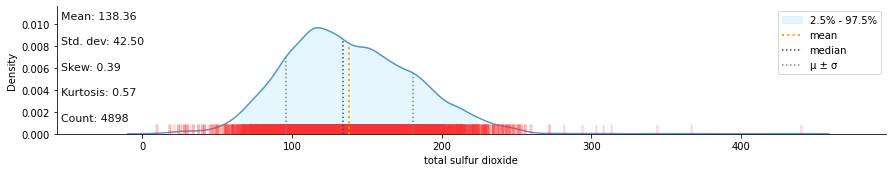

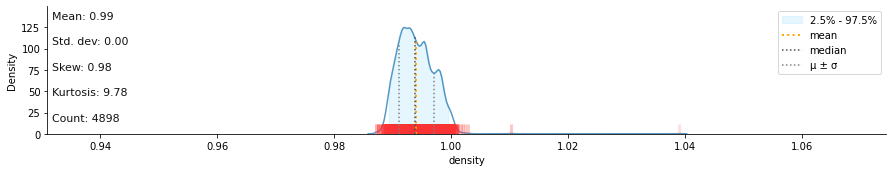

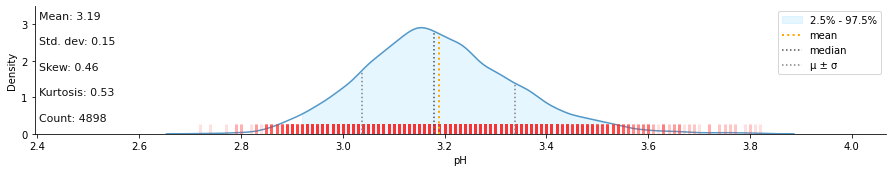

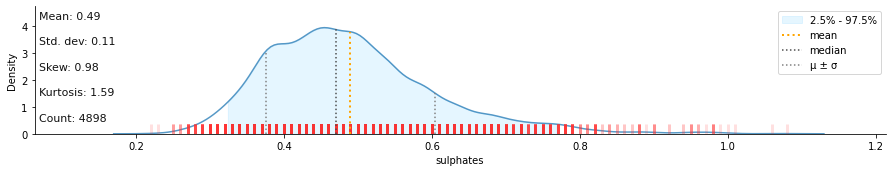

In [14]:
print("White Wine")
klib.dist_plot(data = white_wine_dataset[numerical_features])

Red Wine


<AxesSubplot:xlabel='sulphates', ylabel='Density'>

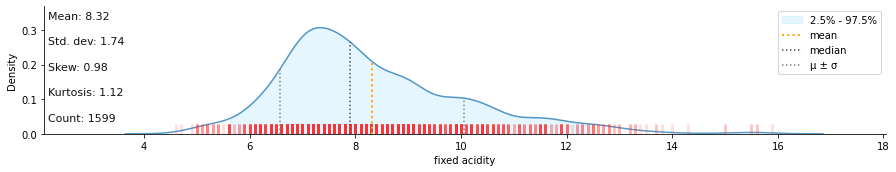

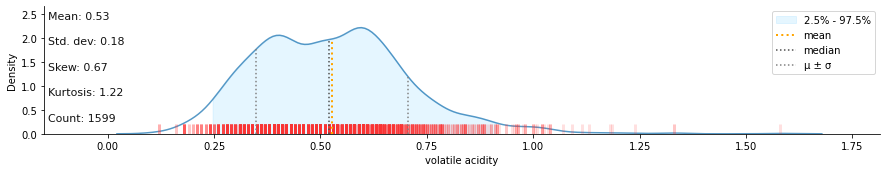

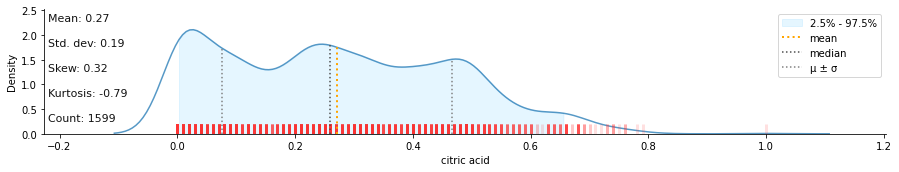

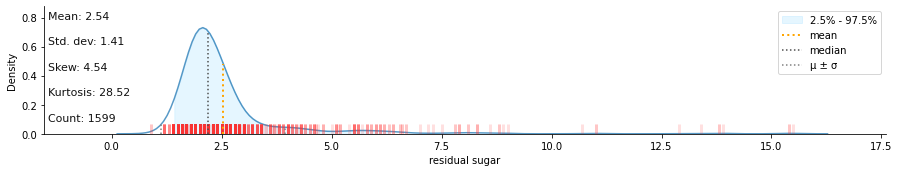

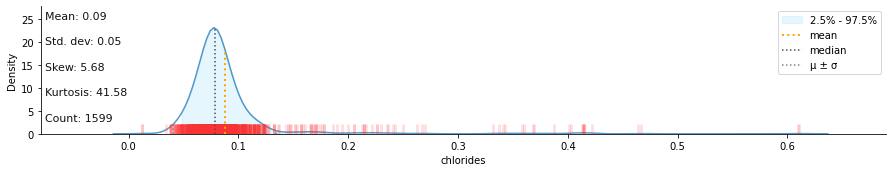

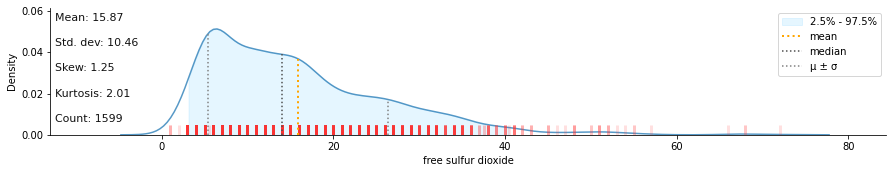

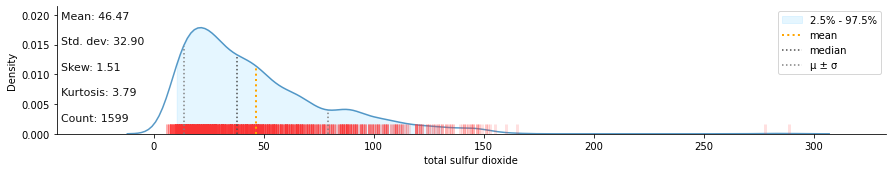

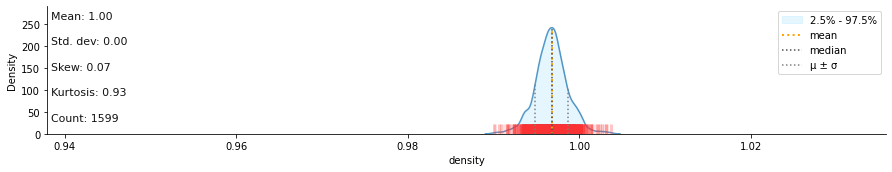

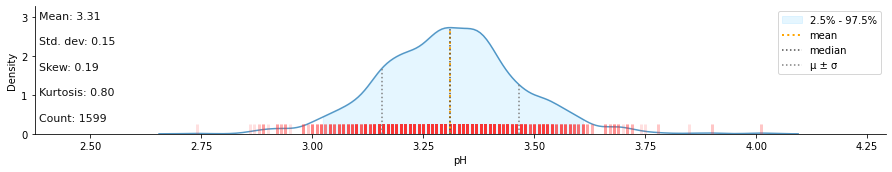

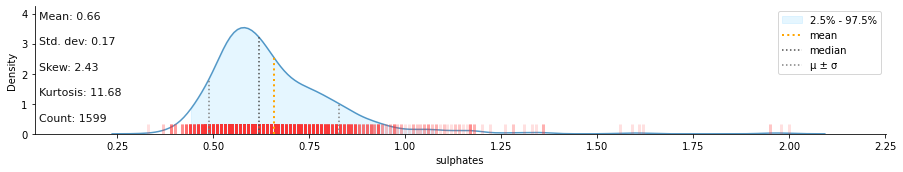

In [15]:
print("Red Wine")
klib.dist_plot(red_wine_dataset[numerical_features])

Box Plot - Comparison & Distribution

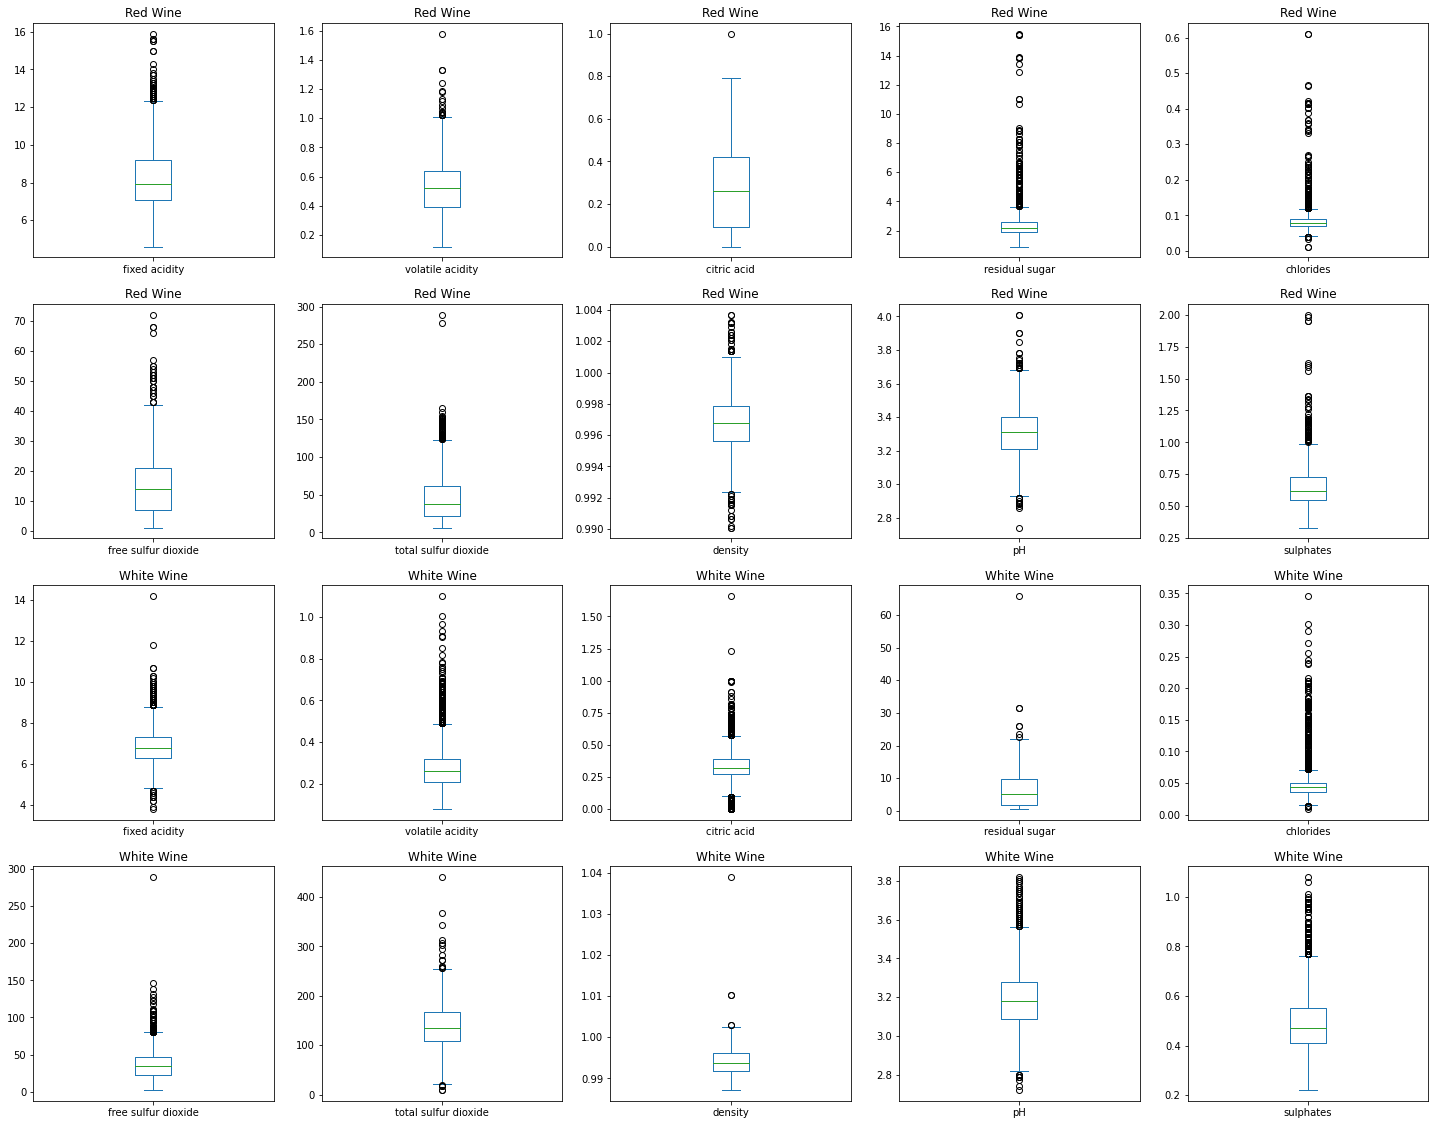

In [16]:
box_plot_features = numerical_features.copy()

current_index = 0

for dataset_index, dataset_key in enumerate(wines):
    for index, feature in enumerate(numerical_features):
        plt.subplot(5, 5, current_index + 1)
        wines[dataset_key][feature].plot(kind = 'box', figsize = (25, 25), title = f"{dataset_key} Wine")
        current_index += 1

### Two Variables

Multiple Bar Charts - Comparison & Composition

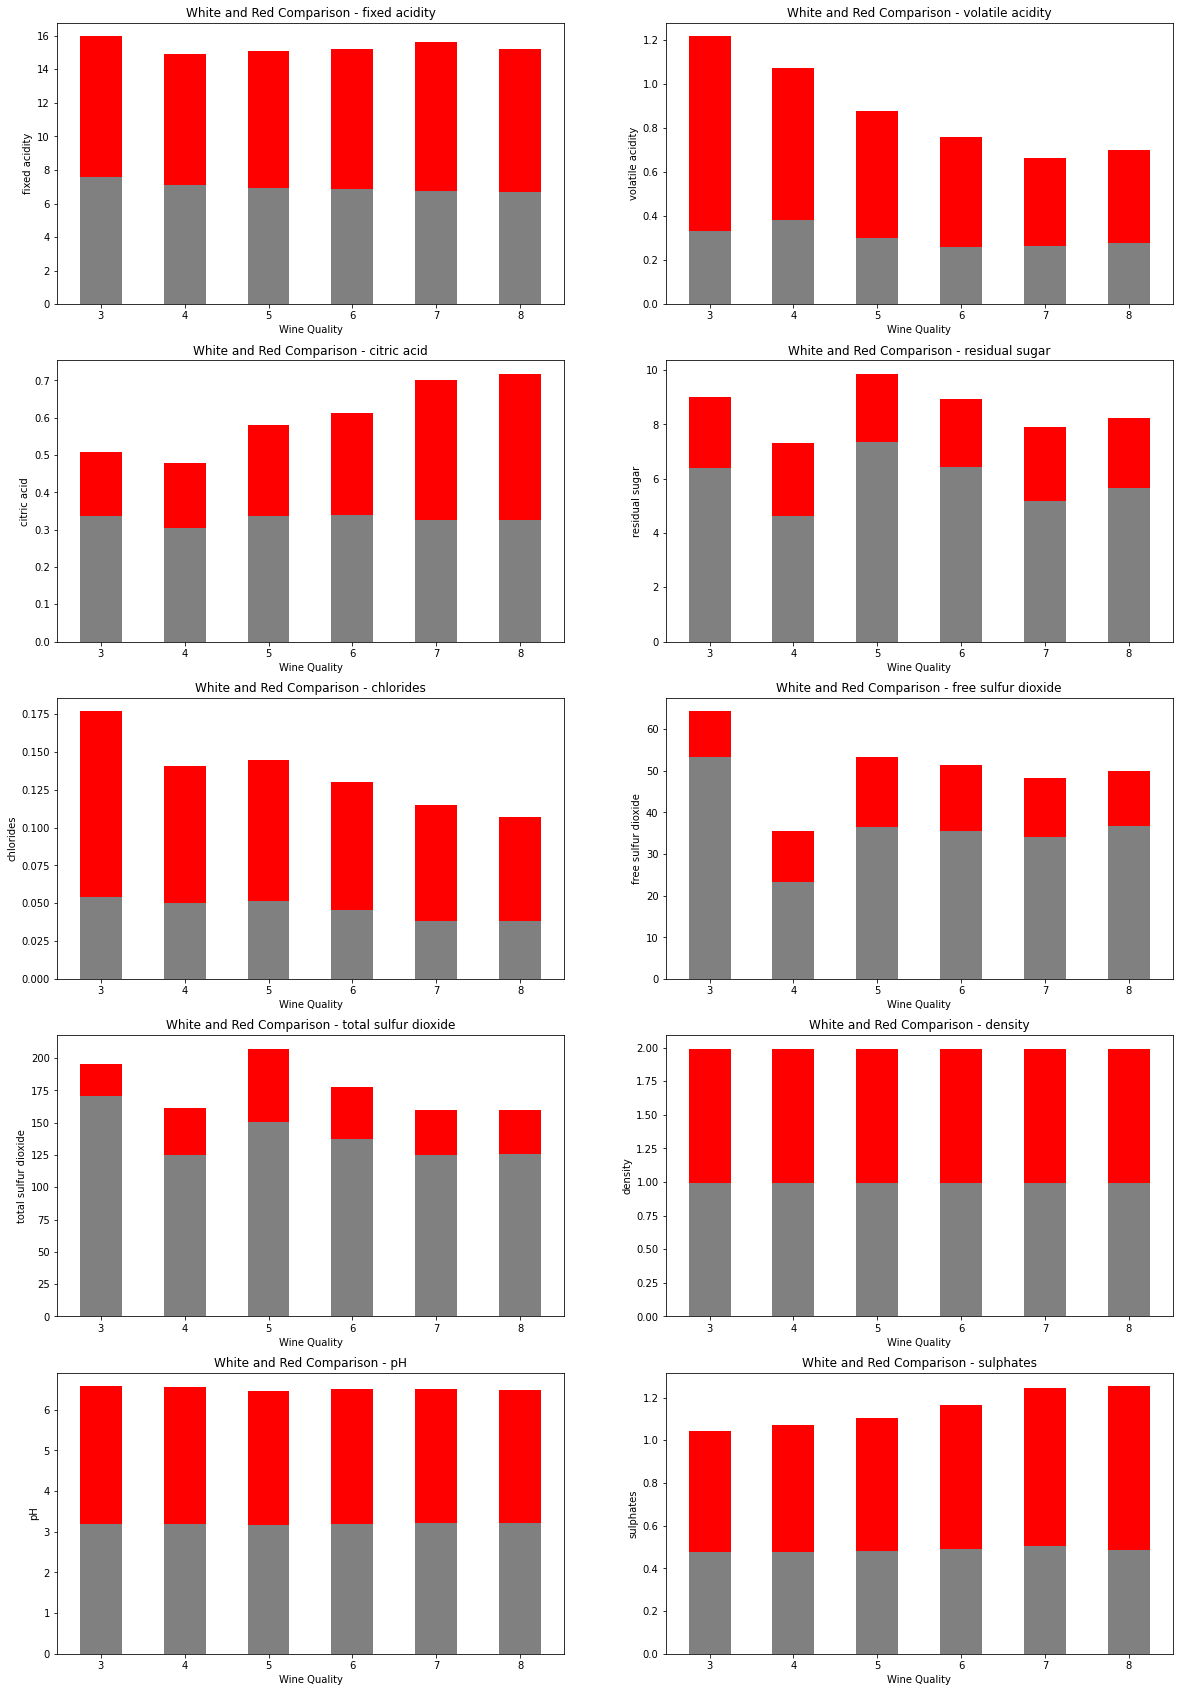

In [ ]:
stacked_bar_fields = numerical_features.copy()
stacked_bar_chart_width = 0.5

white_quality_color = "gray"
red_quality_color = "red"

plt.figure(figsize=(20, 30))

for index, feature in enumerate(stacked_bar_fields):
    plt.subplot(5, 2, index + 1)

    white_quality_mean = white_wine_dataset[[quality_field, feature]].groupby(quality_field).mean()
    red_quality_mean = red_wine_dataset[[quality_field, feature]].groupby(quality_field).mean()

    unique_value_white_wine = list(white_quality_mean.index)[:6]
    unique_value_red_wine = list(red_quality_mean.index)[:6]

    white_quality_mean = white_quality_mean.values.flatten()[:6]
    red_quality_mean = red_quality_mean.values.flatten()[:6]

    
    plt.xlabel("Wine Quality")
    plt.ylabel(feature)

    plt.title(f"White and Red Comparison - {feature}")

    plt.bar(unique_value_white_wine, white_quality_mean, color = white_quality_color, width = stacked_bar_chart_width)
    plt.bar(unique_value_red_wine, red_quality_mean, color = red_quality_color, width = stacked_bar_chart_width, bottom=white_quality_mean)

plt.show()

### Multiple Variables

Pairplot - Distribution & Comparison & Correlation

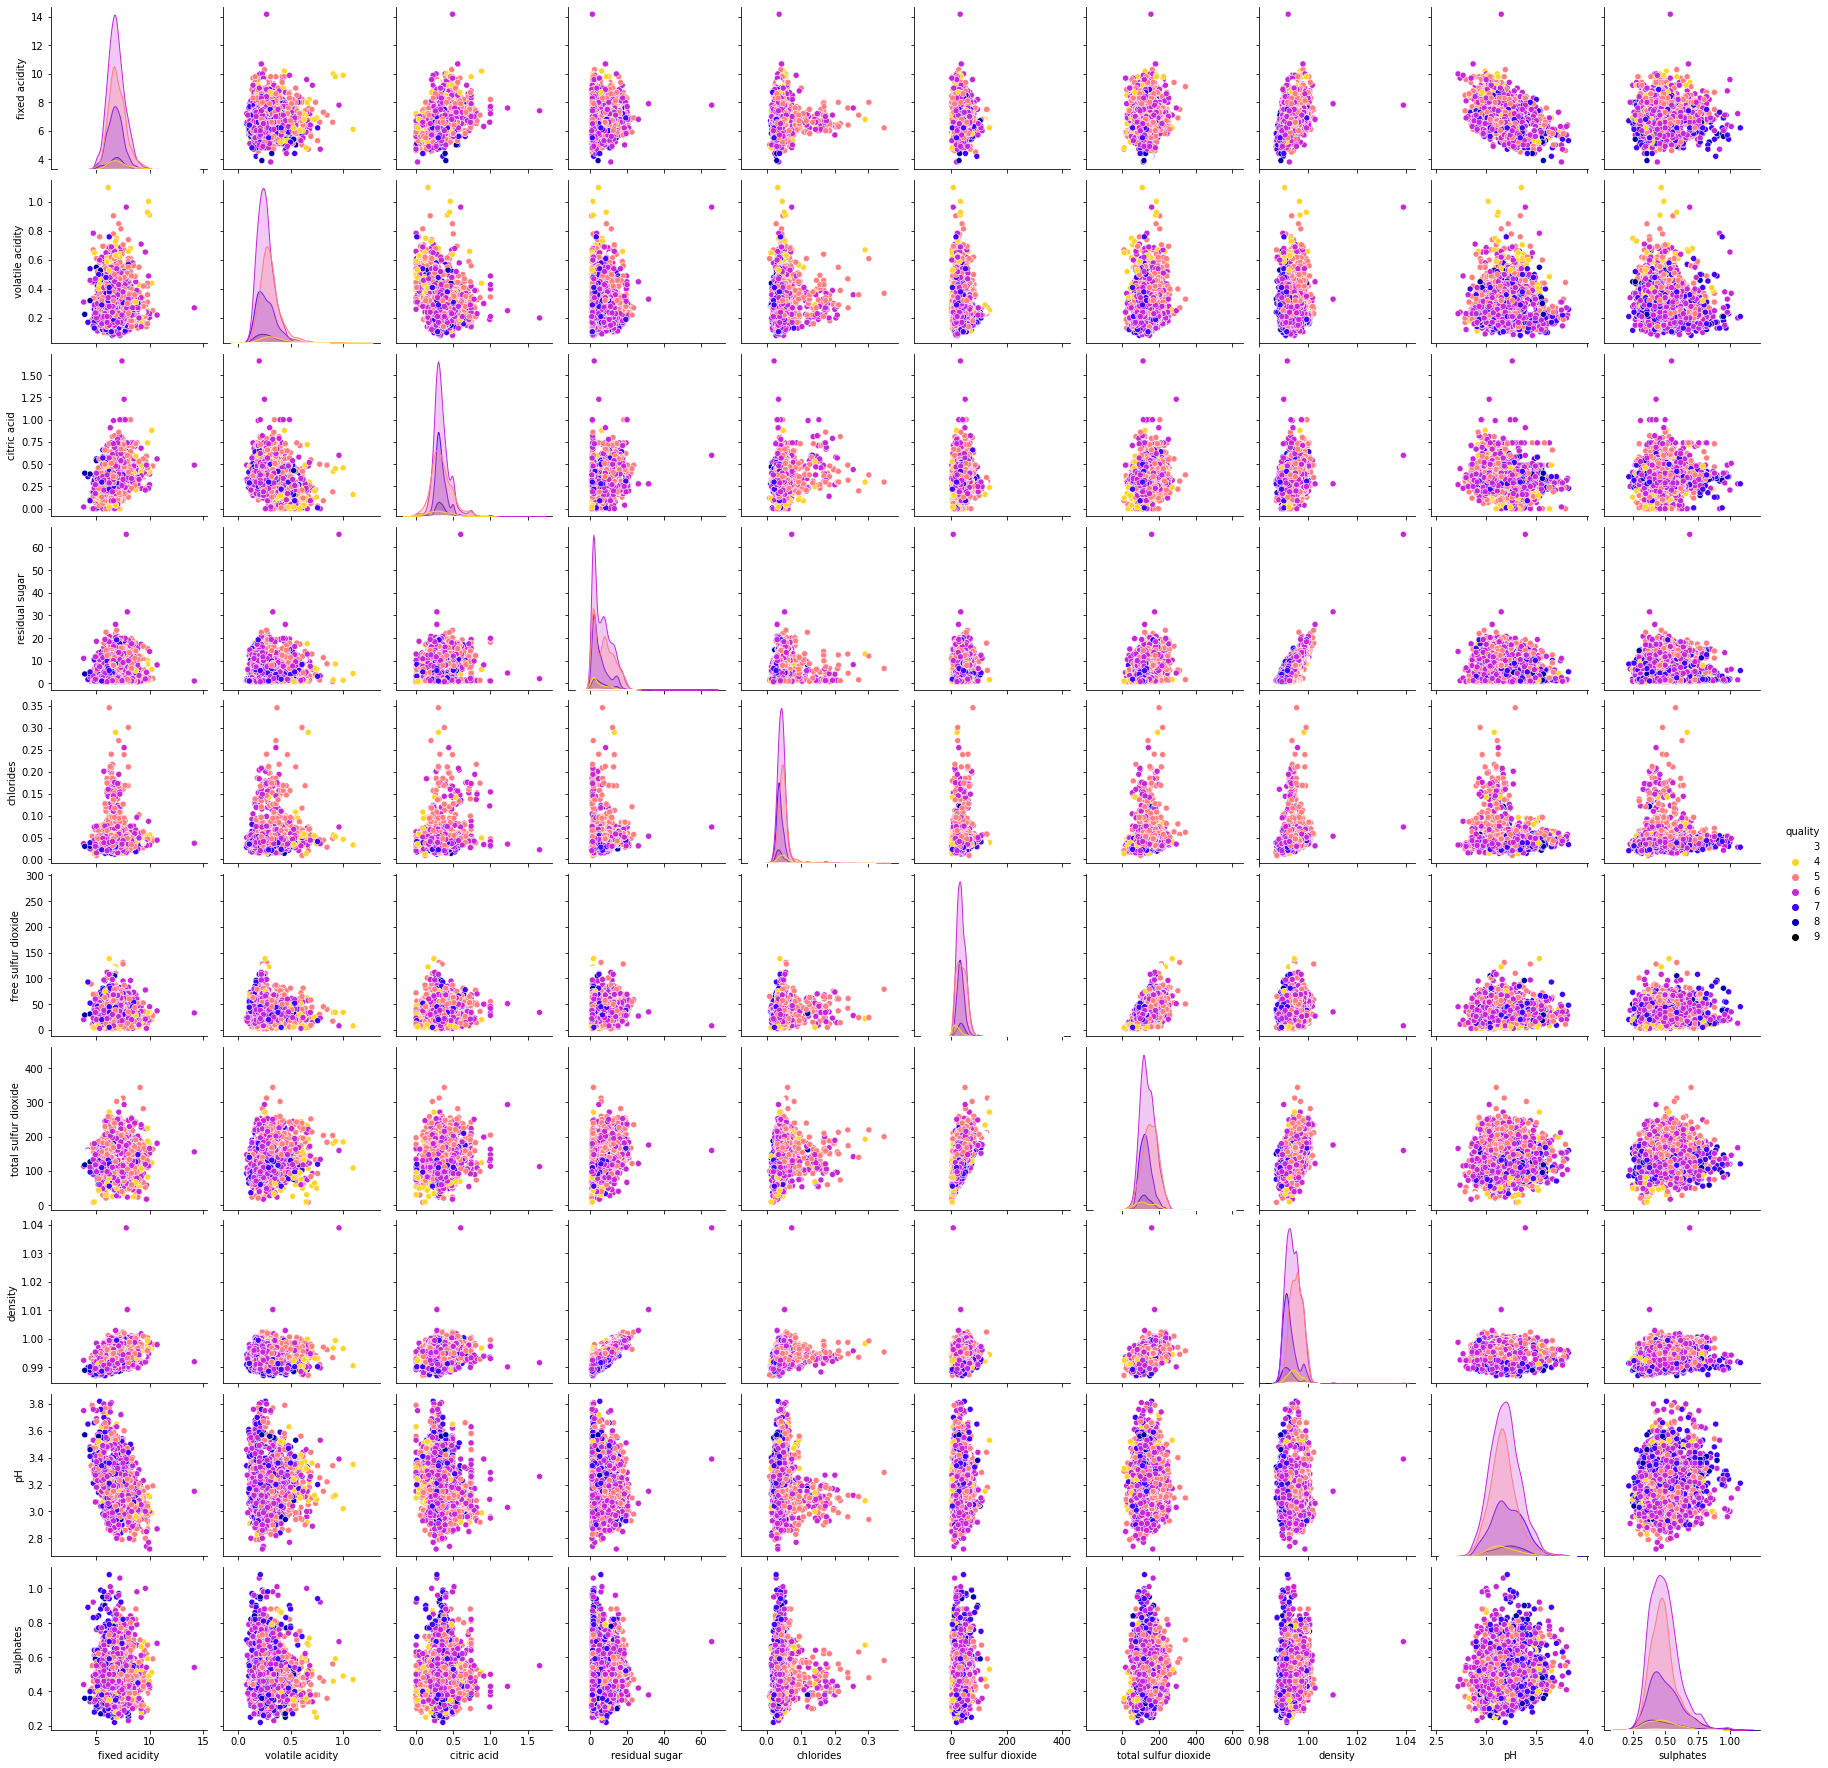

In [17]:
pairplot_fields = numerical_features.copy()
pairplot_fields.append(quality_field)

sns.pairplot(
    data = white_wine_dataset[pairplot_fields], 
    hue = quality_field,
    palette = 'gnuplot2_r',
)
plt.show()

In [ ]:
sns.pairplot(
    data = red_wine_dataset[pairplot_fields], 
    hue = quality_field,
    palette = 'gnuplot2_r',
)
plt.show()

Correlation Plot - Correlation

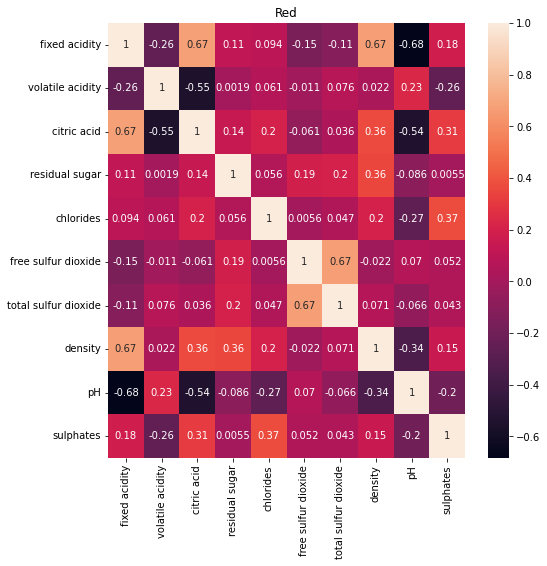

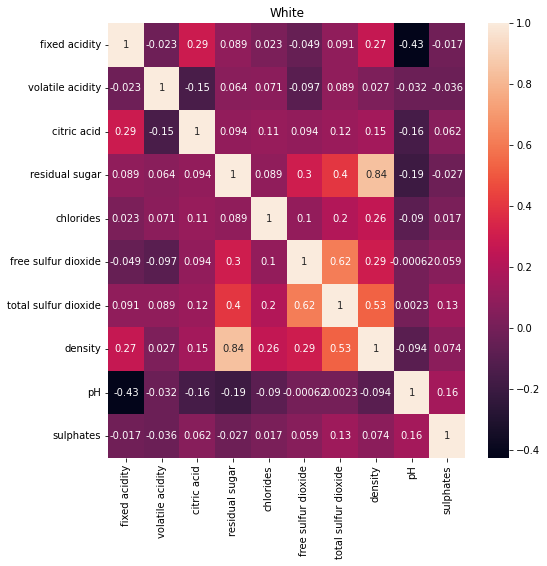

In [22]:
correlation_fields = numerical_features.copy()

for dataset_index, dataset_key in enumerate(wines):
    correlation_values = wines[dataset_key][correlation_fields].corr()
    plt.figure(figsize = (8, 8))
    plt.title(dataset_key)
    sns.heatmap(data = correlation_values, annot = True)
    plt.show()

# Data Preprocessing

**Train Test Split**

Here, we are going to split the dataset. The purpose is to measure accuracy with data that AI has never eccountered before.

Now, we're going to split the dataset with this criteria:
* On white wine dataset: 1279 data train dan 320 data test.
* On red wine dataset: 3918 data train dan 980 data test.

In [28]:
x_red_train, x_red_test, y_red_train, y_red_test = train_test_split(
    red_wine_dataset[features],
    red_wine_dataset[target],
    test_size = 0.2
)
x_white_train, x_white_test, y_white_train, y_white_test = train_test_split(
    white_wine_dataset[features],
    white_wine_dataset[target],
    test_size = 0.1
)

print("Red Wine: ")
print(x_red_train.shape)
print(x_red_test.shape)
print(y_red_train.shape)
print(y_red_test.shape)

print()

print("White Wine:")
print(x_white_train.shape)
print(x_white_test.shape)
print(y_white_train.shape)
print(y_white_test.shape)

Red Wine: 
(1279, 10)
(320, 10)
(1279,)
(320,)

White Wine:
(4408, 10)
(490, 10)
(4408,)
(490,)


# Data Modelling

In this model, we are going to use several basic models. Since this is a classification problem, we are going to use machine learning classification algorithm (multivariate).

Also, in the next section, we are going to use SHAPValues. So, let's take one simple model from three different machine learning types.

* Gradient based: SGD Classifier
* Distance based: SVM (Scalable Vector Machine)
* Tree based: Decision Tree

Furthermore, we are going to use hyperparameter Tuning. Hyperparameter tuning is a technique to automatize the hyperparameter tuning process. This means, we won't have to determine the optimal model ourselves. Imagine if the model has many hyperparameters in a multidimensional space. The more hyperparameters in the model, the more combination of values of the hyperparameters in a multi-dimensional space. Which means, by using automated hyperparameter tuning, we can instantly get the optimal hyperparameter values.

In this model, we are going to use 2 different hyperparameter tuning, they are:

* Grid Search
* Bayesian Optimization

Initialize All Parameters for Each Model

In [ ]:
sgd_parameters = {
    'max_iter': [100, 400, 700, 1000],
    'tol': [1e-3, 1e-5, 1e-6, 1e-8, 1e-10],
    'fit_intercept': [True, False],
    'alpha': [1e-4, 1e-5, 1e-6]
}

svm_parameters = {
    'max_iter': [100, 400, 700, 1000],
    'tol': [1e-3, 1e-5, 1e-6, 1e-8, 1e-10],
    'fit_intercept': [True, False],
}

decision_tree_parameters = {
    'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.6, 0.8, 1],
    'min_impurity_decrease': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
    'min_samples_leaf': [1, 2, 3, 4],
}

hyperparameter_tuning_parameters = {
    "SGD": sgd_parameters,
    "SVM": svm_parameters,
    "Decision Tree": decision_tree_parameters,
}

**Grid Search**

![Grid Search](https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png)

Image Source: https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png

Grid Search is a technique for applying different combination of all the specified hyperparameters. It calculates the performance for each combination and select the best value for the hyperparameters. Since it uses all hyperparameters possible, it makes the computation heavy and expensive.

![K Fold Cross Validation](https://editor.analyticsvidhya.com/uploads/80341521px-K-fold_cross_validation_EN.svg.png)

Image Source: https://editor.analyticsvidhya.com/uploads/80341521px-K-fold_cross_validation_EN.svg.png

In Grid Search, we can also use Cross Validation (K-Fold Cross Validation). Cross Validation is a technique for dividing the data into 2 parts: train and test. Take a look at the illustration above. On each iteration, there is always K - 1 training data and 1 test data. After each iteration, it will calculate the performance of the model. This process continues until it reaches iteration K.

**Bayesian Optimization**

In short, bayesian hyperparameter optimization is the purpose to keep track of past evaluation results. These results will be built in order to form a probabilistic model that maps hyperparameters to score.

From the mapping above, the objective function is defined as following:

$P(score | hyperparameters)$

To build a bayesian optimization model, below is the methods:
* Build a surrogate probability model of the objective function
* FInd the best hyperparameters for surrogate function
* Apply these hyperparameters on the true objective function
* Update surrogate model combining with with the new results
* Repeat steps 2 - 4, until max iterations or time is reached

Bayesian optimization methods are efficient, because they choose the next hyperparameters in an informed manner. The model spends a little more time selecting the next hyperparameters to make fewer calls to the objective function. To sum up, bayesian model can find better parameters in less time, because they find the best hyperparameters based on past iterations.

Here, we are going to use Seqential Model based optimization (SMBO). SMBO is a formalization of bayesian optimization. It provides the best hyperparameter tuning by applying bayesian reasoning and update the probability model (surrogate).

There are 5 aspects for model SMBO:
* **Domain of hyperparameters.** 
  
  These are defined exactly the same we did on parameters initialization on Grid Search.
  
* **Objective function**
  
  The objective function takes the model hyperparameters and outputs a score from that model. From the score itself, we will minimize or maximize the next hyperparameters based of the model function called surrogate.

* **Surrogate Function**
  
  This function is also called response surface. It's the probability representation from objective functions using historical evaluations. Here, we are going to use Tree Parzen Estimator.

  Tree structured parzen estimator (TPE): The SMBO Formula looks like this.
  ![TPE](https://miro.medium.com/max/512/1*4D1QpDZzWpBOl7ANBhsSJA.png)

  Source: https://miro.medium.com/max/512/1*4D1QpDZzWpBOl7ANBhsSJA.png

  Here, p (x | y) gives the probability of the hyperparameters from the score of the objective function.

  ![TPE P(X|Y)](https://miro.medium.com/max/582/1*idWxsGylqq2ZaMGpHmbxDg.png)

  Source: https://miro.medium.com/max/582/1*idWxsGylqq2ZaMGpHmbxDg.png

  Here, we make 2 different distributions for the hyperparameter:
  * Objective value < l(x)
  * Objective value > g(x)

* **Criteria (Selection function)**

  ![Selection Function Formula](https://miro.medium.com/max/716/1*ebsqjhOTSGKBbIR_RLkjSQ.png)

  Source: https://miro.medium.com/max/716/1*ebsqjhOTSGKBbIR_RLkjSQ.png

  Selection function is the criteria for choosing the hext hyperparameters from the surrogate function. The most common choice of criteria is expected improvement. The aim is to maximize the expected improvement with respect to x. So, from the best hyperparameters under the surrogate function. From the surrogate function, it will find the best hyperparameters from the surrogate function p(y|x).

* **History (score, hyperparameter)**

  Each time when the algorithm proposes new hyperparameters, it evaluates with the objective function and records the result in a pair (score, hyperparameters).The algorithm uses l(x) and g(x) from the history, to improve objective function with each iteration.


# Data Representation

We all know that machine learning models are called black box, which makes the interpretation difficult. So, in order to understand how each feature affects the model, we can use explainable machine learning techniques. One of the technique to do so is called SHAPValues (Shapley Additive Explanations).

SHAPValues method comes from game theory and is used to increase interpretability of machine learning models. This model is suitable for any kind of machine learning models, such as linear model, tree based model or optimization model.

**One thing to remember is that SHAPValue does not evaluate the quality of the model. It's only used on how each feature contributes to the model.**

SHAPValues is based on Shapley values. SHAP is used for calculating the contribution each feature brings impact to the prediction from the model.
 
Shapley values are based on the idea of each possible combination of players should be considered to determine the importance of a single player. These combinations are called a <ins>power set</ins>, and can be represented as a tree. Suppose if we have a dataset with fields of age, job, and gender. So, we have a tree like below.

![Power Set of SHAPValue](https://miro.medium.com/max/700/1*GOwxZ1ApAidTIDoa2l98ew.png)

Source: https://miro.medium.com/max/700/1*GOwxZ1ApAidTIDoa2l98ew.png

From the picture above, we can see that we have 8 different possible coalitions of features (2 ^ n). In SHAP, it trains a different predictive model for each distinct coalition (2 ^ F models). The models that are trained are the same, the only difference is on the features included in the model.

Let's assume that each model (nodes) from different combinations of features predicts like the tree below.

![Model Prediction Example](https://miro.medium.com/max/700/1*9oHGJ9kAMaUUEYtnfKKKEA.png)

**SHAP Formula Part 1**

Two nodes connected by an edge differ in one feature. The gap between connected nodes are imputed to the effect of additional feature (Example: Age -> Age and Job, the prediction increases by 45 $). This is also called <ins>marginal contribution</ins>.

In order to obtain the overall effect of age on the final model, it's important to consider all the edges connecting two nodes, such that.

* The upper one doesn't contains Age
* The bottom one contains age

If represented as a tree, it looks like this.

![Overall Effect of Age](https://miro.medium.com/max/700/1*7keBLSQszepu5jITz8SKxA.png)

All these marginal contributions are then aggregated through a weighted average. In formula:

![Weigted Average](https://miro.medium.com/max/700/1*QpRB2gX5uJVU2cWRkrNvsA.png)

Where w1 + w2 + w3 + w4 = 1

Source: https://miro.medium.com/max/700/1*7keBLSQszepu5jITz8SKxA.png

**SHAP Formula Part 2**

Idea for calculating weights:

* The sum of all weights in the same row should be the same with the sum of all weights on any other row. (E.g. w1 = w2 + w3 = w4)
* All the edges on the same row should equal to each row (e.g. w2 = w3)

The weight of an edge is the repciprocal of the total number of edges in the same row. The number of edges of each row is determined by this formula:

![Number of edges in each row](https://miro.medium.com/max/700/1*Wa7mMf4KR8Lh9bPXdtzM8g.png)

![Weights from number of edges](https://miro.medium.com/max/700/1*wOLS6BO2vGTSB4sCoAb6fQ.png)

Now, we can calculate SHAP Value of age for x₀:

![SHAP Value of Age for x₀](https://miro.medium.com/max/700/1*AwrLs6-GRrruYZ4euTUQmA.png)

**Complete Formula**

<table>
    <tr>
        <th>SHAP Formula for feature x</th>
    </tr>
    <td>
        <img src = "https://miro.medium.com/max/700/1*U4yqx7idwCpWznTcP9Ntqg.png">
    </td>
</table>

**Which means, we have the conclusion for SHAP Values: we sum the SHAP values of each feature of a given observation yields the difference between the prediction of the model and the null model.**
